In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('titanic.csv', index_col='PassengerId')
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Анализ данных

1 Какое количество мужчин и женщин ехало на корабле? В качестве ответа приведите два числа через пробел.

In [3]:
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

2 Какой части пассажиров удалось выжить? Посчитайте долю выживших пассажиров. Ответ приведите в процентах (число в интервале от 0 до 100, знак процента не нужен), округлив до двух знаков

In [4]:
print(data.size)
print(data.loc[data['Survived']== 1].size)
print ('{:0.2f}'.format(data.loc[data['Survived']== 1].size/data.size*100))

9801
3762
38.38


3 Какую долю пассажиры первого класса составляли среди всех пассажиров? Ответ приведите в процентах (число в интервале от 0 до 100, знак процента не нужен), округлив до двух знаков.

In [5]:
data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [6]:
print(data.size)
print(data.loc[data['Pclass']== 1].size)
print ('{:0.2f}'.format(data.loc[data['Pclass']== 1].size/data.size*100))

9801
2376
24.24


4 Какого возраста были пассажиры? Посчитайте среднее и медиану возраста пассажиров. В качестве ответа приведите два числа через пробел

In [7]:
np.mean(data.Age)

29.69911764705882

In [8]:
np.median(data.Age.dropna())

28.0

5 Коррелируют ли число братьев/сестер/супругов с числом родителей/детей? Посчитайте корреляцию Пирсона между признаками SibSp и Parch

In [9]:
data.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [10]:
print("{:0.2f}".format(data['SibSp'].corr(data['Parch'])))

0.41


6 Какое самое популярное женское имя на корабле? Извлеките из полного имени пассажира (колонка Name) его личное имя (First Name). Это задание — типичный пример того, с чем сталкивается специалист по анализу данных. Данные очень разнородные и шумные, но из них требуется извлечь необходимую информацию. Попробуйте вручную разобрать несколько значений столбца Name и выработать правило для извлечения имен, а также разделения их на женские и мужские.

In [11]:
pd.value_counts(data.loc[data.Sex=='female'].Name.str.split(',').str[0])

Andersson    6
Baclini      4
Skoog        3
Brown        3
Ford         3
            ..
Hirvonen     1
Christy      1
Rosblom      1
Dick         1
Cacic        1
Name: Name, Length: 258, dtype: int64

In [12]:
import re
def get_first_name(name):
    # First word before comma is a surname
    s = re.search('^[^,]+, (.*)', name)
    if s:
        name = s.group(1)
    # get name from braces (if in braces)
    s = re.search('\(([^)]+)\)', name)
    if s:
        name = s.group(1)
    # Removing appeal
    name = re.sub('(Miss\. |Mrs\. |Ms\. )', '', name)
    # Get first left word and removing quotes
    name = name.split(' ')[0].replace('"', '')
    return name

names = data[data['Sex'] == 'female']['Name'].map(get_first_name)
names.value_counts().head()

Anna         15
Mary         15
Elizabeth    11
Margaret     10
Alice         6
Name: Name, dtype: int64

#  Важность признаков

In [78]:
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt
from sklearn import tree

In [85]:
importance_data  = data[['Pclass', 'Fare', 'Age', 'Sex', 'Survived']].dropna()
X = importance_data[['Pclass', 'Fare', 'Age', 'Sex']]
y = importance_data['Survived']
X.head()

,Pclass,Fare,Age,Sex
PassengerId,,,,
1,3,7.2500,22.0,male
2,1,71.2833,38.0,female
3,3,7.9250,26.0,female
4,1,53.1000,35.0,female
5,3,8.0500,35.0,male


закодируем пол как бинарный признак

In [87]:
is_male = (X['Sex'] == 'male').astype(int)
X['Sex'] = is_male

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


строим классификатор и смотрим важность признаков

In [88]:
clf = DecisionTreeClassifier(random_state=241)
clf.fit(X, y)

for name, importance in zip(X.columns, clf.feature_importances_):
    print(name, importance)

Pclass 0.1400052185312419
Fare 0.3034364695314525
Age 0.2560461009790662
Sex 0.30051221095823943


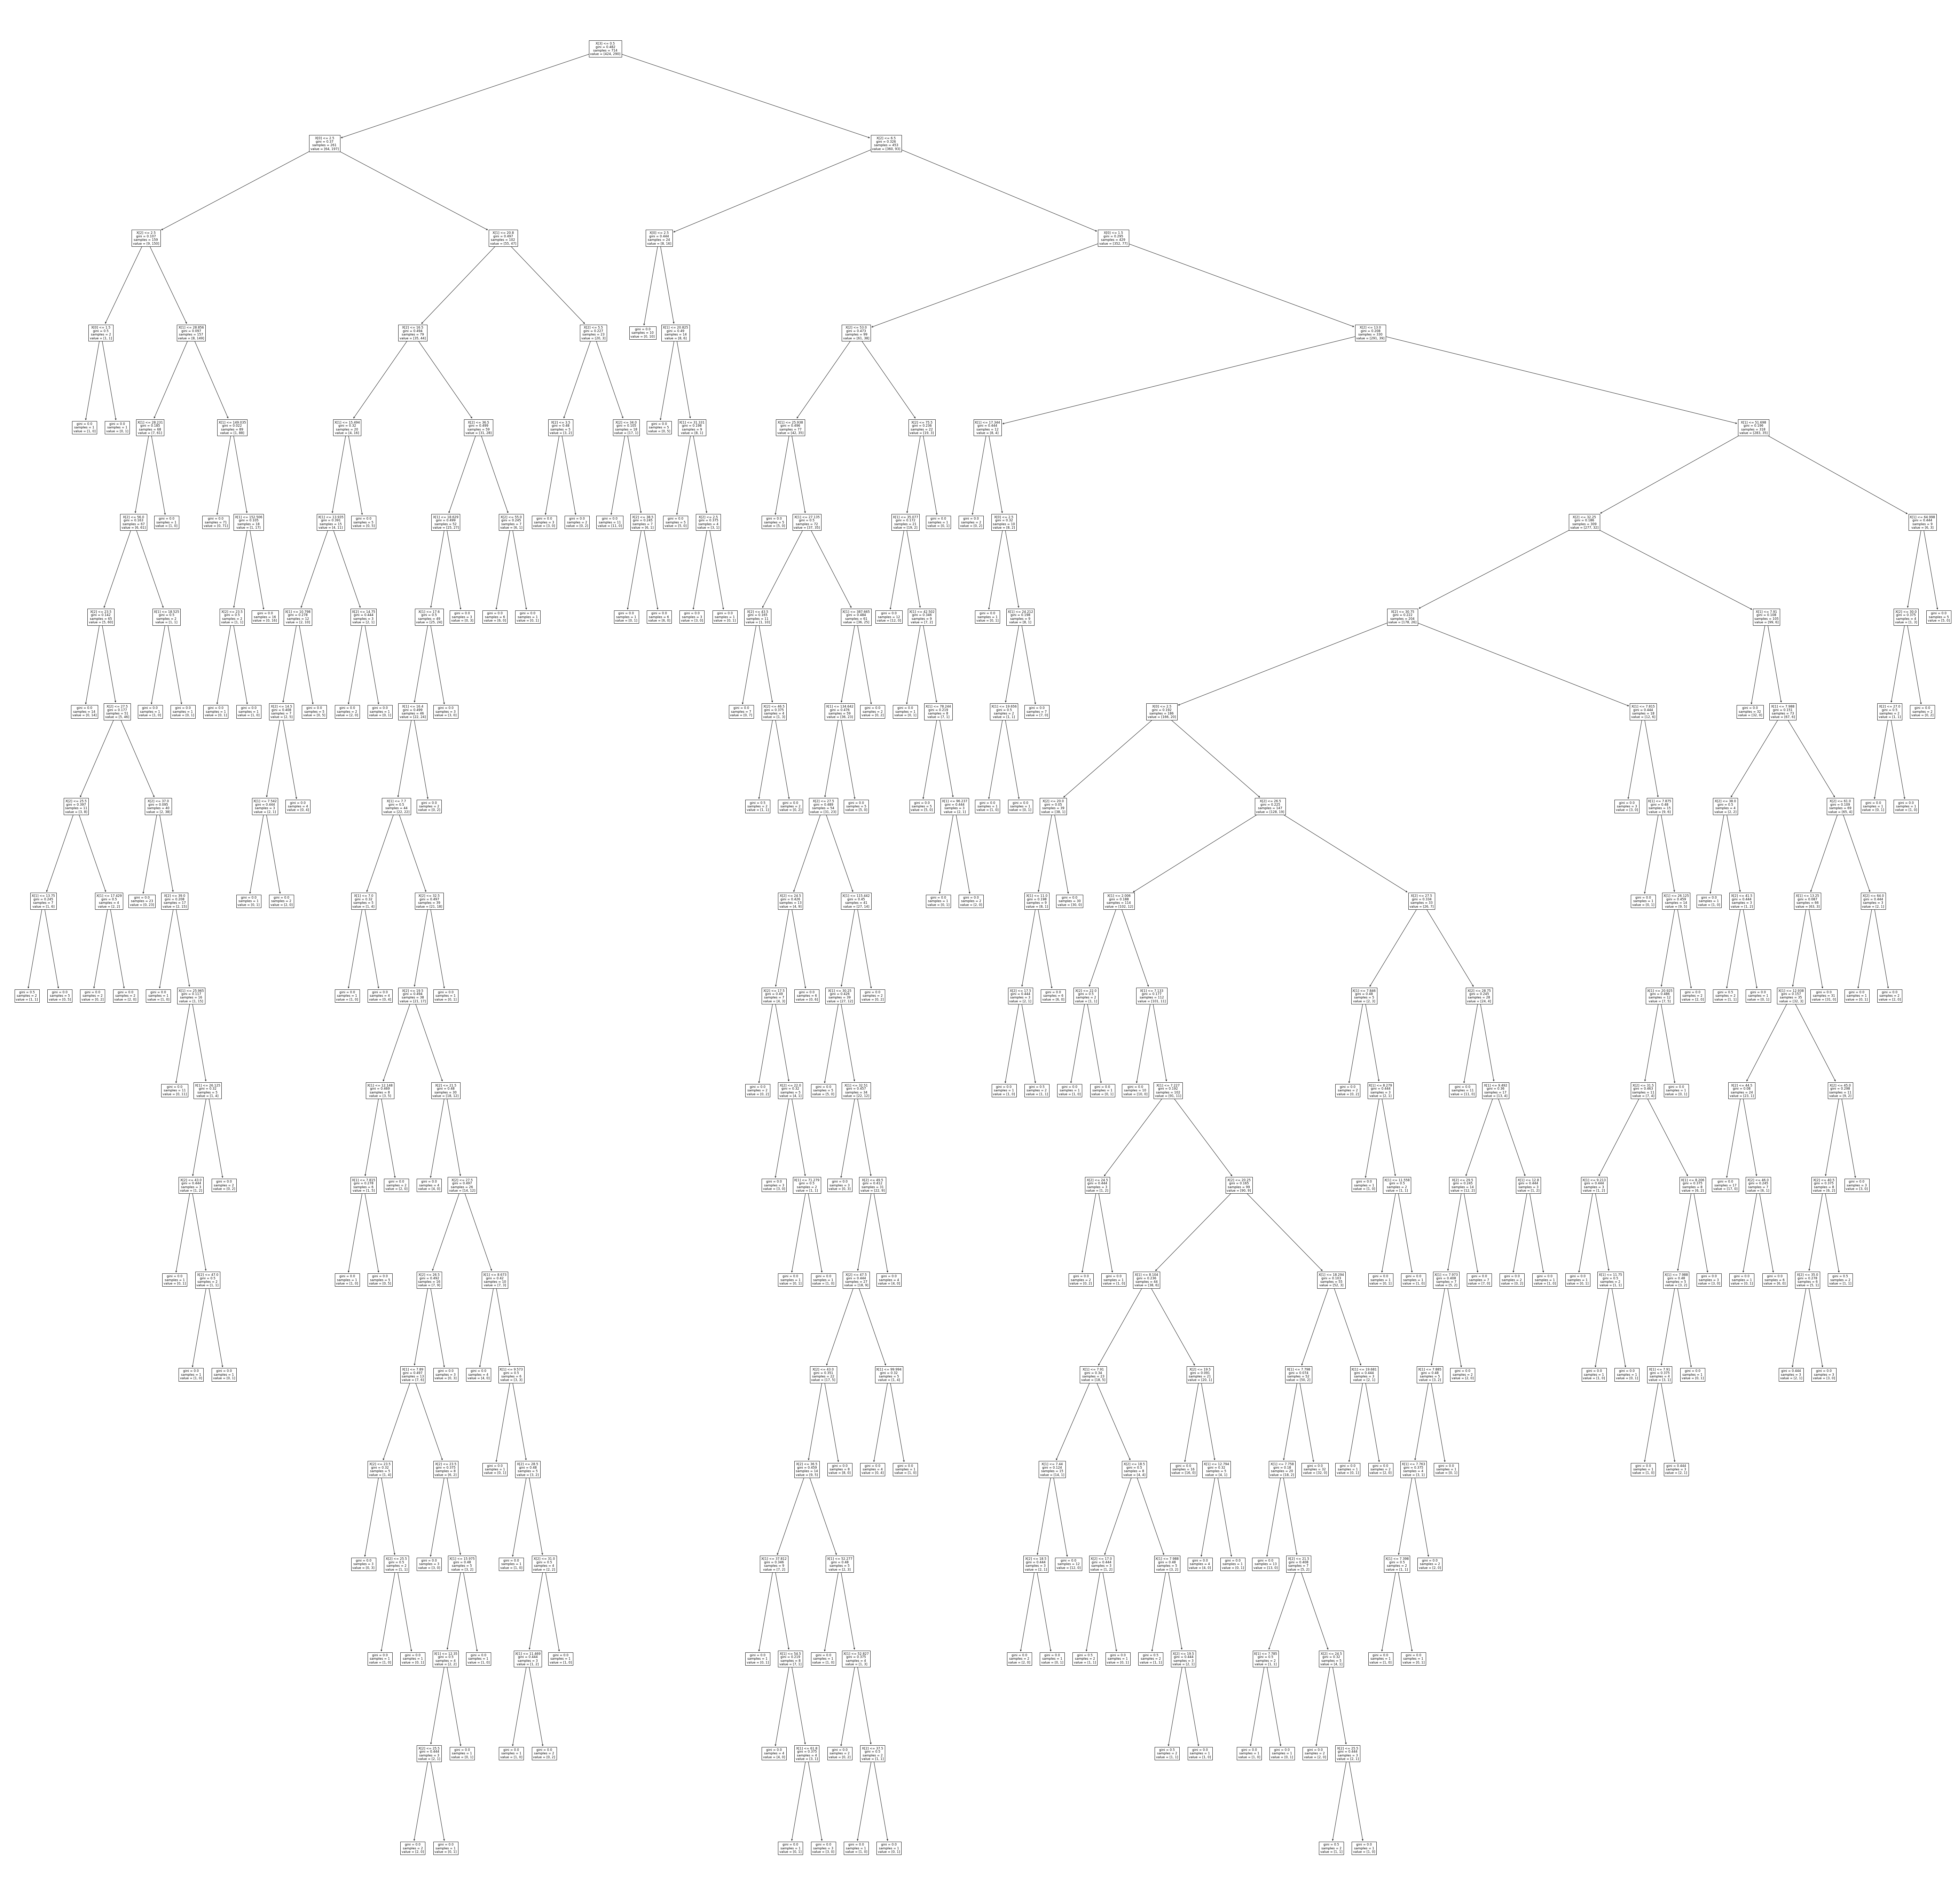

In [80]:
#fig = plt.figure(figsize=(100,100))
#_ = tree.plot_tree(clf)  